CA02: This is a eMail Spam Classifers that uses Naive Bayes supervised machine learning algorithm. 

In this assignment you will ...
1. Complete the code such a way that it works correctly with this given parts of the program.
2. Explain as clearly as possible what each part of the code is doing. Use "Markdown" texts and code commenting to explain the code

IMPORTANT NOTE:

The path of your data folders 'train-mails' and 'test-mails' must be './train-mails' and './test-mails'. This means you must have your .ipynb file and these folders in the SAME FOLDER in your laptop or Google Drive. The reason for doing this is, this way the peer reviewes and I would be able to run your code from our computers using this exact same relative path, irrespective of our folder hierarchy.

In [64]:
import os
import numpy as np
from collections import Counter

from sklearn.naive_bayes import GaussianNB # import necessary model for naive bayes
from sklearn import metrics # import necessary package to access accuracy stats of the model

In [65]:
'''folder refers to a folder that contains files. 
The purpose of this function is to take part of the content of the 
files and insert them into a python dictionary

In this case, the folder contains files that are separate emails.
Each email will be separated into their individual words then the unique words and
their frequencies will be placed in a dictionary.'''

def make_Dict(folder): 
  all_words = [] # define an empty list for adding to later in the function
  emails = [os.path.join(folder,f) for f in os.listdir(folder)] # listdir(folder) returns a list of the file names then each of those file names is concatenated to the folder name to create a valid path to the file within the folder. All of the valid paths are placed in a list
  for mail in emails: # iterate through each email file path in the list created above
    with open(mail) as m: # open the file then refer to it as "m"
      for line in m: # iterate through each line of the email
        words = line.split() # split the current line of email into a list of words, default separator is any whitespace
        all_words += words # add the list of words to the all_words list defined initially
  dictionary = Counter(all_words) # counter takes the list of all words then returns the unique words as keys and their counts as the values
  list_to_remove = list(dictionary) # this takes the unique words from the dictionary created and places them in a list

  for item in list_to_remove: # iterate through list of all unique words
    if item.isalpha() == False: # isaplha checks if all of the characters in the unique word are letters
      del dictionary[item] # if all of the characters are not letters then the word is removed from the dictionary
    elif len(item) <= 2: # if all of the characters are letters but there is two or less characters in the word then the word is deleted.
      del dictionary[item]
  dictionary = dictionary.most_common(word_count) # redefine the dictionary such that it only contains a specified amount of the most common words
  return dictionary # the end product is a dictionary with the most common words and how frequently they appear
            

In [66]:
''' This function creates the matrices that we will use to train the Gaussian model.
The function goes through each email file and counts how frequently the most common words occur in the email.
The most common words are determined by the function we defined in the previous cell.'''

def extract_features(mail_dir):
  files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)] # this is the same as the emails code in the above function
  features_matrix = np.zeros((len(files),word_count)) # creates numpy array with a row for each file and a column for each unique word. The array is initially filled with zeros
  train_labels = np.zeros(len(files)) # creates numpy array with a row for each file and one column. The values will correspond to whether the file represents a spam email or not (1=spam)
  docID = 0; # initiate docID as 0
  for fil in files: # iterate through each email
    with open(fil) as fi: # designate opened email as "fi"
      for i, line in enumerate(fi): # enumerate separates the email into tuples with an index then part of the content of the email corresponding to that index
        if i ==2: # index 2 is associated with the text of the email which is what we are interested in
          words = line.split() # split the text of the email by the whitespace, placing each word in the email in a list
          for word in words: # iterate through each of the words in the list created from the email above
            wordID = 0 # initiate wordID as zero
            for i, d in enumerate(dictionary): # dictionary must be defined before using function - will use previous function to create dictionary from training emails
              if d[0] == word: # if word selected from email equals the word from the dictionary 
                wordID = i # then wordID is set to the index of the word in the dictionary
                features_matrix[docID,wordID] = words.count(word) # alter the features matrix according to the count of the word in the current email. 
      train_labels[docID] = 0; # initiate email label as 0, meaning the email is not spam
      filepathTokens = fil.split('\\') # changed original code from / to \\ because the labels were not being defined correctly
        # use the file path name to determine if the email is spam or not
      lastToken = filepathTokens[len(filepathTokens)-1] # extract the last piece of the path to determine if the email is labeled as spam
      if lastToken.startswith("spmsg"): # if the path contains "spmsg" then the train_labels list is updated to 1
        train_labels[docID] = 1; # change label to indicate spam 
      docID = docID + 1 # increase docID by one, meaning we begin looking at the next email and start the process over
  return features_matrix, train_labels                

In [67]:
# Enter the "path" of your "train_mails" and "test-mails" FOLDERS in this cell ...
TRAIN_DIR = './train-mails' # set up path to training set to use in extract_features function
TEST_DIR = './test-mails' # set up path to test set to use in extract_features function 

In [68]:
word_count = 4000 # this determines how long the list of common words should be that will go in the dictionary
dictionary = make_Dict(TRAIN_DIR) # using training emails to determine list of most common words

print ("reading and processing emails from TRAIN and TEST folders")
features_matrix, labels = extract_features(TRAIN_DIR) # use function to get word frequencies and labels
test_features_matrix, test_labels = extract_features(TEST_DIR) #  use function to get word frequencies and labels of test data

reading and processing emails from TRAIN and TEST folders


In [69]:
new_train = features_matrix[:,:3000] # define new training set by keeping 3000 most common words
new_label = labels
new_test = test_features_matrix[:,:3000] # define new test set by keeping 3000 most common words
new_t_label = test_labels

# TRAIN the model using Naive Bayes algorithm, then PREDICT and then evaluate PERFORMANCE (Accuracy)
print("Training Model using Gaussian Naive Bayes algorithm .....")
cnb = GaussianNB() # set up algorithm 
cnb.fit(new_train, new_label) # use training data and corresponding labels to set up the algorithm
print("Training completed")

print("testing trained model to predict Test Data labels")
label_predict = cnb.predict(new_test) # use trained model to predict test set

print("Completed classification of the Test Data ....","\n","now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")
print("Accuracy:",metrics.accuracy_score(new_t_label, label_predict)*100) # print out accuracy
print("Confusion Matrix","\n",metrics.confusion_matrix(new_t_label, label_predict)) # print confusion matrix
print("Recall:",metrics.recall_score(new_t_label, label_predict)*100) # print recall of model
print("Precision:",metrics.precision_score(new_t_label, label_predict)*100) # print precision of model


Training Model using Gaussian Naive Bayes algorithm .....
Training completed
testing trained model to predict Test Data labels
Completed classification of the Test Data .... 
 now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:
Accuracy: 96.53846153846153
Confusion Matrix 
 [[129   1]
 [  8 122]]
Recall: 93.84615384615384
Precision: 99.1869918699187


In [70]:
# import pandas dataframe to use in for loop
import pandas as pd

In [87]:
# set up for loop to train model with different length dictionaries then add results to a dataframe
df = pd.DataFrame(columns=['Dict_len', 'Accuracy', 'Precision','Recall']) # initiate dataframe
for i in range(100,4050,10): # use dictionaries from length 100 to 4,050 in increments of 10
    new_train = features_matrix[:,:i] # define new training set by keeping i most common words
    new_label = labels
    new_test = test_features_matrix[:,:i] # define new test set by keeping i most common words
    new_t_label = test_labels

    # In this section enter your code to TRAIN the model using Naive Bayes algorithm, then PREDICT and then evaluate PERFORMANCE (Accuracy)
    cnb = GaussianNB() # set up algorithm 
    cnb.fit(new_train, new_label) # use training data and corresponding labels to set up the algorithm

    label_predict = cnb.predict(new_test) # use trained model to predict test set 
    
    acc = round(metrics.accuracy_score(new_t_label, label_predict)*100,2) # assign accuracy to variable and round to 2 decimals
    rec = round(metrics.recall_score(new_t_label, label_predict)*100,2) # assign recall to variable and round to 2 decimals
    prec = round(metrics.precision_score(new_t_label, label_predict)*100,2) # assign precision to variable and round to 2 decimals
    
    df.loc[i] = [i, acc, prec, rec]
    

In [89]:
# print out dictionary lengths that returns the highest accuracy
df[df['Accuracy']==df['Accuracy'].max()]

# in the output we see that the dictionary lengths of 1,670 to 1710 words get us our maximum accuracy

,Dict_len,Accuracy,Precision,Recall
1670,1670.0,98.08,99.21,96.92
1680,1680.0,98.08,99.21,96.92
1690,1690.0,98.08,99.21,96.92
1700,1700.0,98.08,99.21,96.92
1710,1710.0,98.08,99.21,96.92


In [79]:
import matplotlib.pyplot as plt # import pyplot to visualize how the length of dictionary affects the accuracy

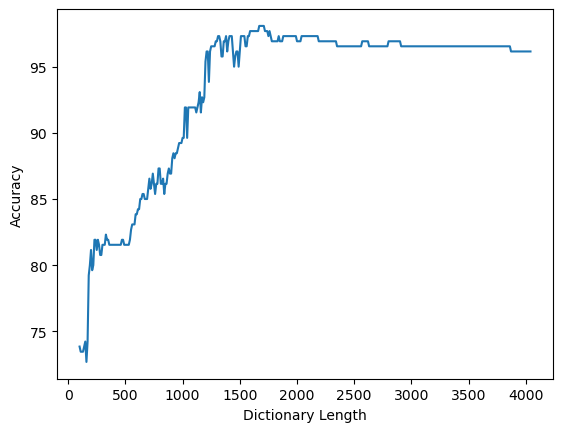

In [90]:
# use pyplot to graph length and accuracy
plt.plot(df['Dict_len'],df['Accuracy'])
plt.xlabel('Dictionary Length')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
''' We can see from the graph there are diminishing returns to using a larger dictionary.
Once the dictionary length reaches approximately 1200 there is not a significant change in the
accuracy. '''

======================= END OF PROGRAM =========================